<a href="https://colab.research.google.com/github/satishchaudhary382/RFM/blob/master/montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
!pip install pandas_montecarlo
import pandas_montecarlo

  Created wheel for pandas-montecarlo: filename=pandas_montecarlo-0.0.2-cp36-none-any.whl size=7555 sha256=88fa02dbe7eefb4588bb5d9c6dc069e0cba8264856bcb3e755c0ca31325953d1
  Stored in directory: /root/.cache/pip/wheels/8c/29/44/622bf8ea542ec73a0901a765b9102dd49f9e1076be3efc5411
Successfully built pandas-montecarlo


In [0]:
df = pd.read_excel("/content/stock.xlsx", sheet_name='hbl', parse_dates=['Date'])

In [0]:
df.set_index("Date", inplace = True)

In [0]:
e = df[['Close']]

In [7]:
e['return'] = e['Close'].pct_change().fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
mc= e['return'].montecarlo(sims = 1000,bust = -.1,goal =1)

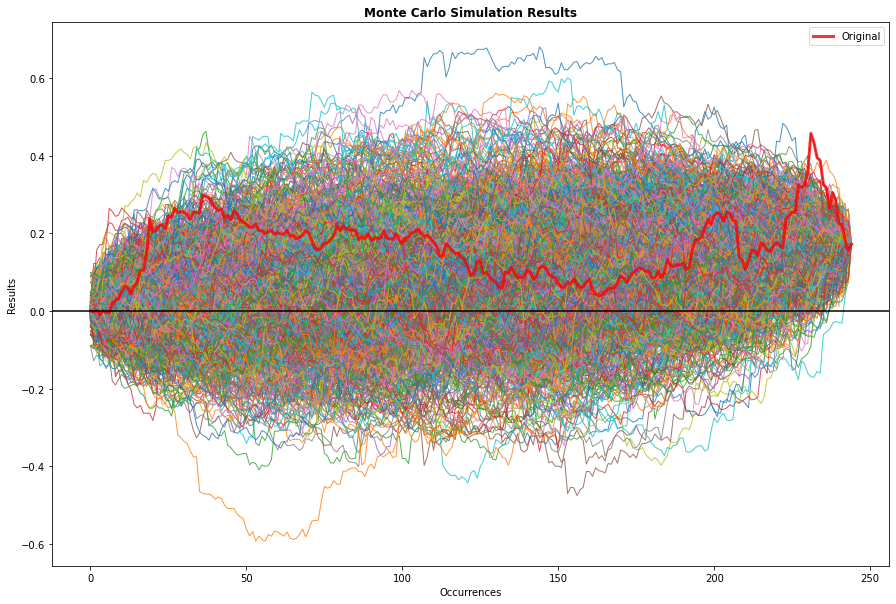

In [15]:
mc.plot(figsize = (15,10))

In [0]:
df = mc.data

In [0]:
df['mean'] = df.mean(axis=1)

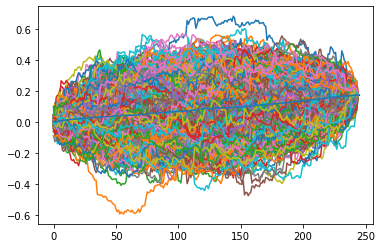

In [18]:
df.cumsum().plot(legend = None)

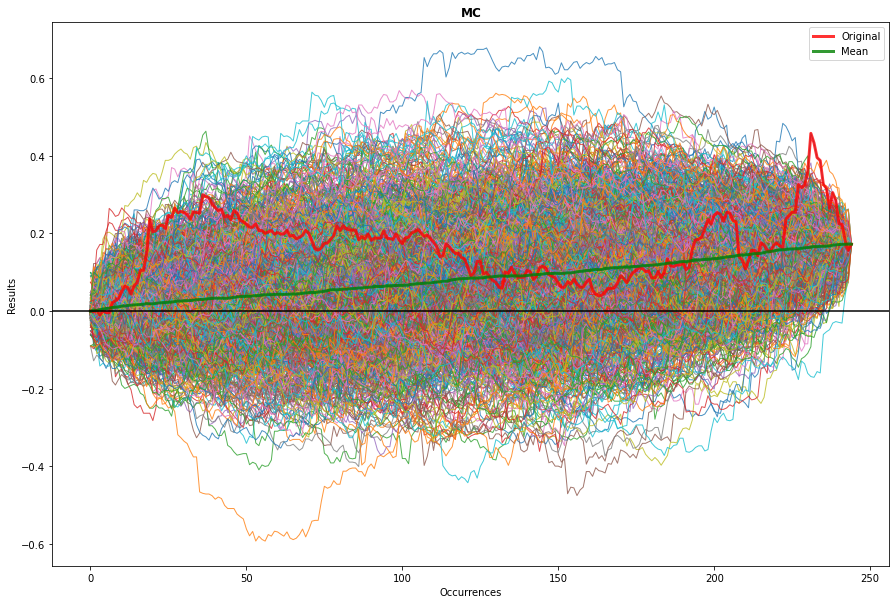

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df.cumsum(), lw=1, alpha=.8)
ax.plot(df.cumsum()["original"], lw=3, color="r", alpha=.8, label="Original")
ax.plot(df.cumsum()["mean"], lw=3, color="g", alpha=.8, label="Mean")
ax.axhline(0, color="black")
ax.legend()
ax.set_title("MC", fontweight="bold")
plt.ylabel("Results")
plt.xlabel("Occurrences")
plt.show()
        

In [0]:
shiv = pd.read_excel("/content/stock.xlsx", sheet_name='shiv', parse_dates=['Date'])
shiv.set_index('Date',inplace = True)

In [21]:
s = shiv[['Close']]
s['return'] = s['Close'].pct_change().fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
s

,Close,return
Date,,
2019-03-24,418,0.000000
2019-03-25,377,-0.098086
2019-03-26,340,-0.098143
2019-03-27,340,0.000000
2019-03-28,333,-0.020588
...,...,...
2020-03-15,549,-0.040210
2020-03-16,549,0.000000
2020-03-17,514,-0.063752


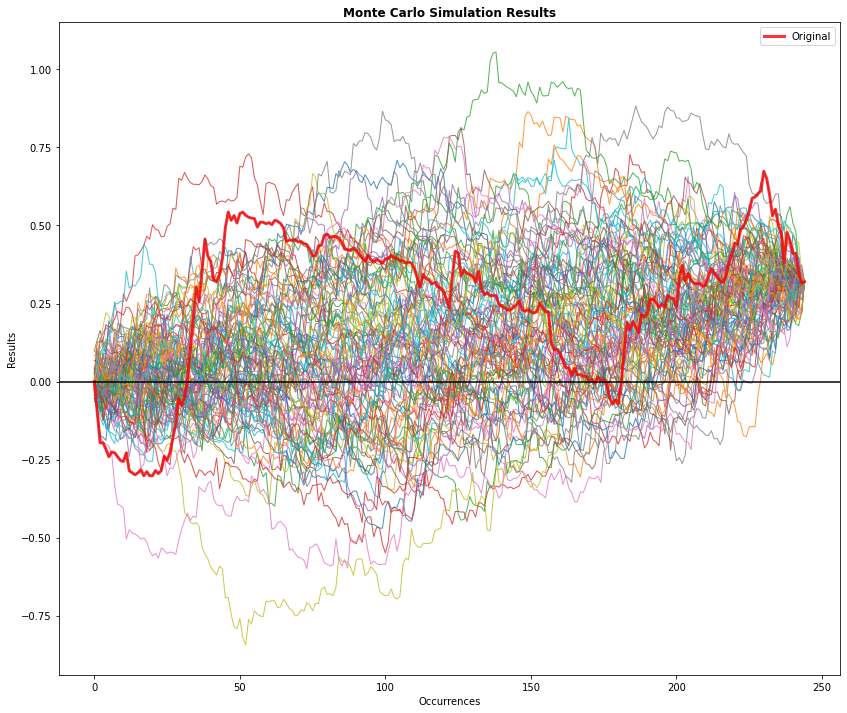

In [89]:
m = s['return'].montecarlo(sims = 100,bust = -.1,goal =1)
m.plot(figsize = (14,12))